# Data Cleaning with Python in Colab using csv data stored on github.

In [1509]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

I am working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

I previously uploaded the dataset to my github account, and I am loading it from there.



In [1510]:
# Load the audible_raw.csv file from my github account into a dataframe audible_df:
file_path = 'https://raw.githubusercontent.com/cristina0000/2025_git_projects/refs/heads/main/p6_py_clean_data/audible_raw.csv'
audible_df = pd.read_csv(file_path)


# View the first rows of the dataframe:
audible_df


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [1511]:
# Inspect the columns' data types
audible_df.info()
# Note that they are all object (data type string)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method



In [1512]:
# Remove Writtenby: from the author column
audible_df['author'] = audible_df['author'].str.replace('Writtenby:', '')

# Remove Narratedby: from the narrator column
audible_df['narrator'] = audible_df['narrator'].str.replace('Narratedby:', '')

# Check the results
audible_df



,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [1513]:
# Get a glimpse of the stars column
audible_df.stars.sample(10)


,stars
17111,Not rated yet
83488,4 out of 5 stars1 rating
84875,Not rated yet
10110,Not rated yet
31716,Not rated yet
37485,Not rated yet
37615,Not rated yet
25706,5 out of 5 stars47 ratings
73425,Not rated yet
61616,Not rated yet


Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [1514]:
# Explore the values of the star column that are not 'Not rated yet'
audible_df[audible_df.stars!='Not rated yet'].stars.sample(10)



,stars
83913,3 out of 5 stars1 rating
4293,5 out of 5 stars1 rating
69603,5 out of 5 stars4 ratings
36039,4 out of 5 stars4 ratings
44522,5 out of 5 stars14 ratings
84666,4.5 out of 5 stars11 ratings
54423,4 out of 5 stars22 ratings
49976,4.5 out of 5 stars3 ratings
38685,4.5 out of 5 stars37 ratings
27366,4.5 out of 5 stars76 ratings


As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [1515]:
# Replace 'Not rated yet' with NaN

audible_df['stars'] = audible_df['stars'].replace('Not rated yet', np.nan)
audible_df



,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,NaN,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,NaN,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,NaN,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,NaN,680.00


We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.



In [1516]:
# Extract number of stars from the stars column into a new column rating_stars
# Use a regular expression to extract from the beginning of the string any number of digits or dots
audible_df['rating_stars'] = audible_df['stars'].str.extract(r'^([\d.]+)').astype(float)

# Extract number of ratings from the stars column into a new column n_ratings
# Replace the comma (for example '4.5 out of 5 stars1,346 rating's' becomes '4.5 out of 5 stars1346')
# Use a regular expression to extract digits before the string "rating"
audible_df['n_ratings'] = audible_df['stars'].str.replace (',', '').str.extract(r'(\d+) ratings').astype(float)

# Examine the new rating_stars and n_ratings columns
audible_df[['rating_stars', 'n_ratings']]


,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [1517]:
audible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   stars         15072 non-null  object 
 7   price         87489 non-null  object 
 8   rating_stars  15072 non-null  float64
 9   n_ratings     9250 non-null   float64
dtypes: float64(2), object(8)
memory usage: 6.7+ MB


In [1518]:
#investigate the difference in non-null values for rating_stars and n_ratings
audible_df[
    (audible_df['rating_stars'].notna()) &
    (audible_df['n_ratings'].isna()) &
    (audible_df['stars'].notna())
]

,name,author,narrator,time,releasedate,language,stars,price,rating_stars,n_ratings
55,Keys to the Demon Prison,BrandonMull,E.B.Stevens,17 hrs and 37 mins,01-08-13,English,5 out of 5 stars1 rating,516.00,5.0,NaN
58,Captain Underpants and the Revolting Revenge o...,DavPilkey,"LenForgione,AshtonSundholm,JadenRogers",2 hrs and 10 mins,02-11-21,English,5 out of 5 stars1 rating,445.00,5.0,NaN
83,Tiger Honor,YoonHaLee,ElissaPark,7 hrs and 36 mins,04-01-22,English,5 out of 5 stars1 rating,586.00,5.0,NaN
105,The Disappearance,FranklinW.Dixon,TimGregory,3 hrs and 50 mins,14-05-19,English,4 out of 5 stars1 rating,305.00,4.0,NaN
107,Billionaire Boy,DavidWalliams,"DavidWalliams,NitinGanatra",3 hrs and 8 mins,09-06-11,English,5 out of 5 stars1 rating,266.00,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...
87228,Why We Fly,EvanRail,EvanRail,56 mins,23-06-14,English,5 out of 5 stars1 rating,100.00,5.0,NaN
87337,River Town,PeterHessler,PeterBerkrot,14 hrs and 36 mins,04-05-10,English,5 out of 5 stars1 rating,836.00,5.0,NaN
87340,Figures in a Landscape,PaulTheroux,EdoardoBallerini,16 hrs and 44 mins,07-06-18,English,4 out of 5 stars1 rating,949.00,4.0,NaN
87362,Tower of London,iMinds,AbbeyHolmes,8 mins,23-12-09,English,5 out of 5 stars1 rating,33.00,5.0,NaN


In [1519]:
audible_df[
    (audible_df['rating_stars'].notna()) &
    (audible_df['n_ratings'].notna()) &
    (audible_df['stars'].notna())
]

,name,author,narrator,time,releasedate,language,stars,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...,...
86991,The Art of Travel,AlaindeBotton,NicholasBell,5 hrs and 22 mins,01-02-13,English,3 out of 5 stars4 ratings,820.00,3.0,4.0
86993,Bending Over Backwards,CarloPizzati,ManishDongardive,5 hrs and 42 mins,12-11-20,English,5 out of 5 stars3 ratings,668.00,5.0,3.0
87010,Blood River,TimButcher,TimButcher,9 hrs and 41 mins,26-02-08,English,4 out of 5 stars3 ratings,672.00,4.0,3.0
87017,The Innocents Abroad,MarkTwain,GroverGardner,18 hrs and 13 mins,09-09-11,English,4.5 out of 5 stars2 ratings,937.00,4.5,2.0


In [1520]:

# Fix the issue - it needs to be rating, and not ratings, because rating will capture all possibilities
# Extract number of ratings from the stars column into a new column n_ratings
# Replace the comma (for example '4.5 out of 5 stars1,346 rating's' becomes '4.5 out of 5 stars1346')
# Use a regular expression to extract digits before the string "rating" - it needs to be rating, not ratings, because 1rating versus 33ratings, rating will capture all these
audible_df['n_ratings'] = audible_df['stars'].str.replace (',', '').str.extract(r'(\d+) rating').astype(float) #changed from ratings to rating

# Examine the new rating_stars and n_ratings columns
audible_df.info()
# And now we see the same number of non-null for rating_stars and n_ratings, as expected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   stars         15072 non-null  object 
 7   price         87489 non-null  object 
 8   rating_stars  15072 non-null  float64
 9   n_ratings     15072 non-null  float64
dtypes: float64(2), object(8)
memory usage: 6.7+ MB


As a last step, let's delete the `stars` column using the `.drop` command:

In [1521]:
# Drop the stars column
audible_df.drop('stars', axis=1, inplace=True)

# Check the results
audible_df


,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


## Task 4: Change data types

Another important step is to have our data in the correct data types



In [1522]:
audible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   price         87489 non-null  object 
 7   rating_stars  15072 non-null  float64
 8   n_ratings     15072 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.0+ MB


In [1523]:
# Explore the price column
audible_df['price'].sample(10)

,price
38196,958.00
65167,586.00
51784,"1,328.00"
64784,305.00
56229,586.00
27783,300.00
18996,300.00
4207,164.00
62860,703.00
57934,879.00


We need to get rid of the comma and the word 'Free' before we can convert the data.

In [1524]:
# Replace the comma with ''
audible_df['price'] = audible_df['price'].str.replace(',', '')
# Replace 'Free' with 0
audible_df['price'] = audible_df['price'].str.replace('Free', '0')





In [1525]:
# Turn price to float
audible_df['price'] = audible_df['price'].astype(float)

# Check the results
audible_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   price         87489 non-null  float64
 7   rating_stars  15072 non-null  float64
 8   n_ratings     15072 non-null  float64
dtypes: float64(3), object(6)
memory usage: 6.0+ MB


* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [1526]:
# Look at the unique values in the rating_stars column
audible_df['rating_stars'].unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

We can now use `.astype` to change the data type.

In [1527]:
# Turn rating_stars to category
audible_df['rating_stars'] = audible_df['rating_stars'].astype('category')

# Check the results
audible_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          87489 non-null  object  
 1   author        87489 non-null  object  
 2   narrator      87489 non-null  object  
 3   time          87489 non-null  object  
 4   releasedate   87489 non-null  object  
 5   language      87489 non-null  object  
 6   price         87489 non-null  float64 
 7   rating_stars  15072 non-null  category
 8   n_ratings     15072 non-null  float64 
dtypes: category(1), float64(2), object(6)
memory usage: 5.4+ MB


* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [1528]:
# Convert releasedate to datetime

audible_df['releasedate'] = pd.to_datetime(audible_df['releasedate'])

# Check the results
audible_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


/tmp/ipython-input-3082739702.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible_df['releasedate'] = pd.to_datetime(audible_df['releasedate'])


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [1529]:
# Explore the values in the time column
audible_df['time'].sample(10)


,time
59067,1 hr and 16 mins
14847,5 hrs and 32 mins
59016,21 mins
42791,5 hrs and 12 mins
86074,32 mins
22612,5 hrs and 6 mins
31398,10 hrs and 48 mins
60577,13 hrs and 24 mins
18444,13 hrs and 6 mins
27654,11 hrs and 11 mins


Let's see what other ways they have encoded `min` or `minutes`:

In [1530]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
audible_df[audible_df['time'].str.contains('min|mins|minutes')]['time'].str.contains('minutes')
# Note different spellings of min: min, mins (not minutes)


,time
0,False
1,False
2,False
3,False
5,False
...,...
87484,False
87485,False
87486,False
87487,False


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [1531]:
# Replace hrs, mins, and 'Less than 1 minute'
audible_df['time'] = audible_df['time'].str.replace('hrs', 'hr')
audible_df['time'] = audible_df['time'].str.replace('mins', 'min')
audible_df['time'] = audible_df['time'].str.replace('Less than 1 minute', '1 min')

# Check the results
audible_df['time'].sample(10)




,time
80591,4 hr and 1 min
54778,8 hr and 25 min
22653,9 hr and 52 min
7004,2 hr and 13 min
61981,3 hr and 35 min
49412,37 min
9630,7 min
25764,3 hr and 55 min
14340,8 hr and 36 min
17510,5 hr and 11 min


Let's see how it looks now:

The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.



In [1532]:
# Extract the number of hours, turn to integer
audible_df['hours'] = audible_df['time'].str.extract(r'(\d+) hr').fillna(0).astype(int)

# Extract the number of minutes, turn to integer
audible_df['mins'] = audible_df['time'].str.extract(r'(\d+) min').fillna(0).astype(int)

# Combine hours and mins into the time_mins column
audible_df['time_mins'] = audible_df['hours'] * 60 + audible_df['mins']


# Check the results
audible_df[['time', 'hours', 'mins', 'time_mins']]


,time,hours,mins,time_mins
0,2 hr and 20 min,2,20,140
1,13 hr and 8 min,13,8,788
2,2 hr and 3 min,2,3,123
3,11 hr and 16 min,11,16,676
4,10 hr,10,0,600
...,...,...,...,...
87484,7 hr and 34 min,7,34,454
87485,10 hr and 7 min,10,7,607
87486,19 hr and 4 min,19,4,1144
87487,4 hr and 8 min,4,8,248


And as final step, let's delete the columns we don't need any more:

In [1533]:
# Drop the time, hours, and mins columns
audible_df.drop(columns=['time', 'hours', 'mins'], inplace=True)




Here is how our dataframe looks now:

In [1534]:
# Inspect the dataframe
audible_df.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,140
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,788
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,600


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

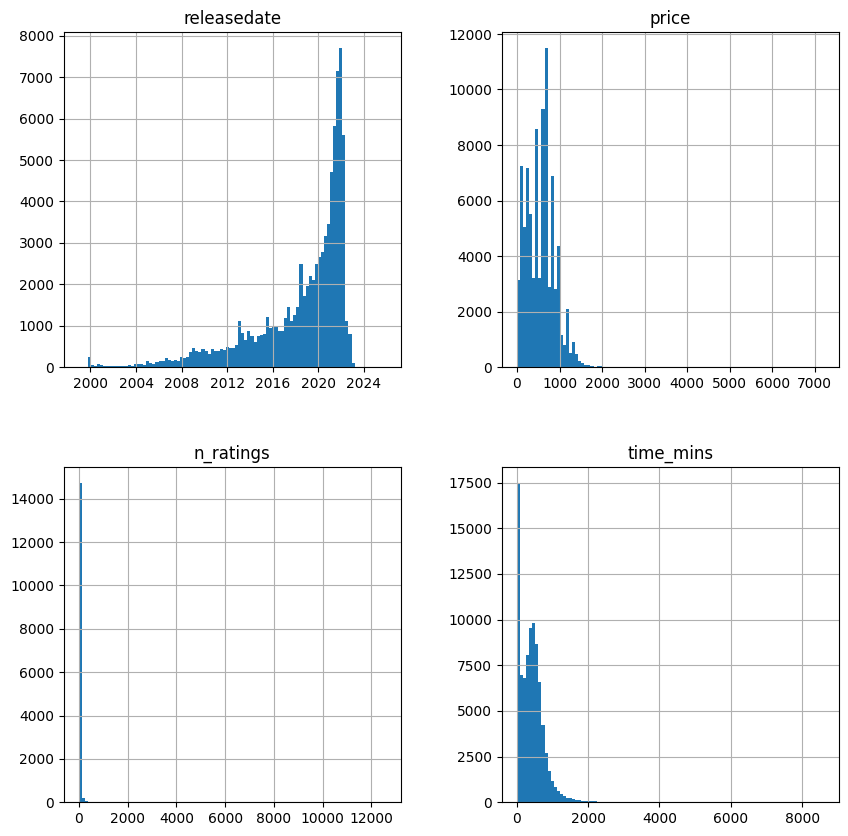

In [1535]:
# Plot histograms of all the numerical columns
audible_df.hist(figsize=(10, 10), bins=100)
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [1536]:
# Look at the numeric columns
audible_df.describe()


,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [1537]:
# Look at the non numeric columns
audible_df.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 INR = 0.012 USD:

In [1538]:
# Transform prices to USD (multiply times 0.012)
audible_df['price'] = audible_df['price'] * 0.012

# Check the results
audible_df['price'].describe()

,price
count,87489.000000
mean,6.708111
std,4.033160
min,0.000000
25%,3.216000
50%,7.020000
75%,9.060000
max,86.376000


The values in the `language` column have different capitalization. Let's fix that.

In [1539]:
# Inspect the language column before making changes - see unique values:
audible_df['language'].unique()


array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [1540]:
# Update capitalization in the language column
audible_df['language'] = audible_df['language'].str.capitalize()

# Check the results
audible_df['language'].unique()


array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [1541]:
# Look for duplicate rows
audible_df.duplicated().sum()


np.int64(0)

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [1542]:
from re import sub
# Create a list of our subset columns and assign to subset_cols
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']

# Check for duplicates using our subset of columns
audible_df.duplicated(subset=subset_cols).sum()


np.int64(70)

Let's look at those values (use `keep=false`) and see what is going on:

In [1543]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible_df[audible_df.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')


,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.900,5.0,1823.0,75


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [1544]:
# Drop duplicated rows keeping the last release date
audible_df.drop_duplicates(subset=subset_cols, keep='last', inplace=True)




We can check again for duplicates:

In [1545]:
# Check again for duplicates using our subset of columns
audible_df.duplicated(subset=subset_cols).sum()


np.int64(0)

## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [1546]:
# Check for null values
audible_df.isna().sum()


,0
name,0
author,0
narrator,0
releasedate,0
language,0
price,0
rating_stars,72387
n_ratings,72387
time_mins,0


We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [1547]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible_df.to_csv('audible_clean_mcs.csv', index=False)

In [1548]:
#download file from Colab working directory to local machine:
from google.colab import files
files.download('audible_clean_mcs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>